In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer,make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error

In [35]:
data ='Data/CarPrice_Assignment.csv'

In [36]:
df = pd.read_csv(data)

In [37]:
df.head(20)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


Linear Regression in statsmodels (Practice)
Task: Run a linear regression with statsmodels predict the price of a car.
Note: you will be revisiting this task for a later assignment, so you will want to create a new GitHub repository for your work.

Dataset Link:  https://www.kaggle.com/datasets/hellbuoy/car-price-prediction 
 Download and save in repo,
Steps to Perform:
    Perform initial preprocessing of data
    Perform preprocessing for statsmodels
    Run the model in statsmodels and produce a results summary
    Evaluate the model on the test set


Submit your assignment repository link. 

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [39]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

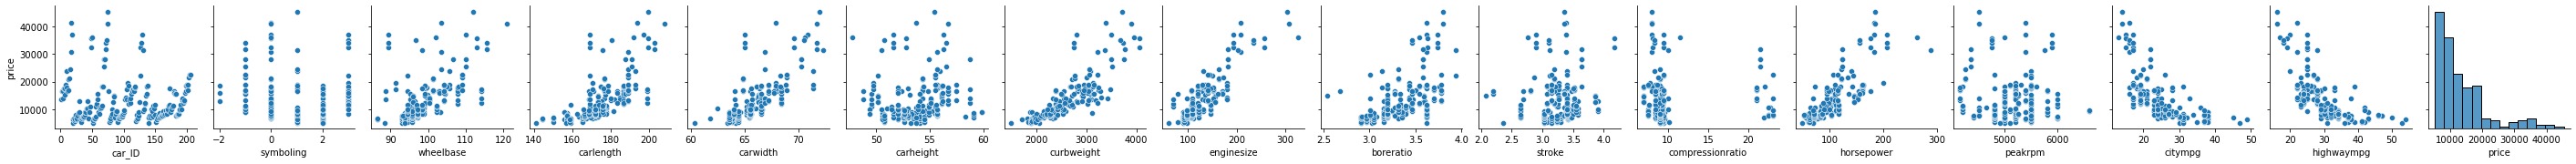

In [40]:
## Quick EDA for cols related to target
sns.pairplot(df,y_vars='price');



In [65]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [42]:
## Make x and y variables
y = df['price'].copy()
X = df.drop(columns=['price','car_ID']).copy()
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state=321)
X_train.head()



,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
17,0,bmw x3,gas,std,four,sedan,rwd,front,110.0,197.0,...,six,209,mpfi,3.62,3.39,8.0,182,5400,15,20
39,0,honda prelude,gas,std,four,sedan,fwd,front,96.5,175.4,...,four,110,1bbl,3.15,3.58,9.0,86,5800,27,33
40,0,honda accord,gas,std,four,sedan,fwd,front,96.5,175.4,...,four,110,1bbl,3.15,3.58,9.0,86,5800,27,33
47,0,jaguar xj,gas,std,four,sedan,rwd,front,113.0,199.6,...,six,258,mpfi,3.63,4.17,8.1,176,4750,15,19
123,-1,plymouth valiant,gas,std,four,wagon,fwd,front,103.3,174.6,...,four,122,2bbl,3.35,3.46,8.5,88,5000,24,30


In [43]:
## make cat selector and using it to save list of column names
cat_select = make_column_selector(dtype_include='object')
cat_cols = cat_select(X_train)
cat_cols



['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [44]:
## make num selector and using it to save list of column names
num_select = make_column_selector(dtype_include='number')
num_cols = num_select(X_train)
num_cols



['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [45]:
## make pipelines
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),#StandardScaler()
                        )
preprocessor = make_column_transformer((cat_pipe,cat_cols),
                                        (num_pipe, num_cols), remainder='passthrough')



In [46]:
## fit the col transformer
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['CarName', 'fueltype', 'aspiration',
                                  'doornumber', 'carbody', 'drivewheel',
                                  'enginelocation', 'enginetype',
                                  'cylindernumber', 'fuelsystem']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['symboling', 'wheelbase', 'carlength',
                                  'carwidth', 'carheight', 'curbweight',
                                  'enginesize', 'boreratio', 'stroke',
                                  'compressionratio', 'horsepower', 'peakrpm',
                                  'citympg', 'highwaympg'])])

In [47]:
pd.DataFrame(preprocessor.transform(X_train).round(3))

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,56.3,3505.0,209.0,3.62,3.39,8.0,182.0,5400.0,15.0,20.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.1,2304.0,110.0,3.15,3.58,9.0,86.0,5800.0,27.0,33.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.1,2372.0,110.0,3.15,3.58,9.0,86.0,5800.0,27.0,33.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52.8,4066.0,258.0,3.63,4.17,8.1,176.0,4750.0,15.0,19.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,59.8,2535.0,122.0,3.35,3.46,8.5,88.0,5000.0,24.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,55.5,2952.0,141.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0
149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.1,2465.0,110.0,3.15,3.58,9.0,101.0,5800.0,24.0,28.0
150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,50.8,1819.0,92.0,2.91,3.41,9.2,76.0,6000.0,31.0,38.0
151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,50.2,2818.0,156.0,3.59,3.86,7.0,145.0,5000.0,19.0,24.0


In [48]:
## Create the empty list
final_features = []


In [49]:
## A) Using named steps dictionary to find the encoder - Part 2
ohe_step = preprocessor.named_transformers_['pipeline-1'].named_steps['onehotencoder']



In [50]:
## Now, get OHE feature names
cat_features = ohe_step.get_feature_names_out(cat_cols)
cat_features



array(['CarName_alfa-romero giulia', 'CarName_alfa-romero stelvio',
       'CarName_audi 100 ls', 'CarName_audi 100ls', 'CarName_audi 5000',
       'CarName_audi 5000s (diesel)', 'CarName_audi fox',
       'CarName_bmw 320i', 'CarName_bmw x1', 'CarName_bmw x3',
       'CarName_bmw x5', 'CarName_bmw z4', 'CarName_buick century',
       'CarName_buick century luxus (sw)',
       'CarName_buick century special', 'CarName_buick opel isuzu deluxe',
       'CarName_buick regal sport coupe (turbo)', 'CarName_buick skylark',
       'CarName_chevrolet impala', 'CarName_chevrolet monte carlo',
       'CarName_chevrolet vega 2300', 'CarName_dodge challenger se',
       'CarName_dodge colt (sw)', 'CarName_dodge coronet custom',
       'CarName_dodge coronet custom (sw)', 'CarName_dodge d200',
       'CarName_dodge rampage', 'CarName_honda accord',
       'CarName_honda accord cvcc', 'CarName_honda civic',
       'CarName_honda civic (auto)', 'CarName_honda civic 1300',
       'CarName_honda civic 

In [51]:
## Add the categorical feature names to our final_features list
final_features.extend(cat_features)
final_features



['CarName_alfa-romero giulia',
 'CarName_alfa-romero stelvio',
 'CarName_audi 100 ls',
 'CarName_audi 100ls',
 'CarName_audi 5000',
 'CarName_audi 5000s (diesel)',
 'CarName_audi fox',
 'CarName_bmw 320i',
 'CarName_bmw x1',
 'CarName_bmw x3',
 'CarName_bmw x5',
 'CarName_bmw z4',
 'CarName_buick century',
 'CarName_buick century luxus (sw)',
 'CarName_buick century special',
 'CarName_buick opel isuzu deluxe',
 'CarName_buick regal sport coupe (turbo)',
 'CarName_buick skylark',
 'CarName_chevrolet impala',
 'CarName_chevrolet monte carlo',
 'CarName_chevrolet vega 2300',
 'CarName_dodge challenger se',
 'CarName_dodge colt (sw)',
 'CarName_dodge coronet custom',
 'CarName_dodge coronet custom (sw)',
 'CarName_dodge d200',
 'CarName_dodge rampage',
 'CarName_honda accord',
 'CarName_honda accord cvcc',
 'CarName_honda civic',
 'CarName_honda civic (auto)',
 'CarName_honda civic 1300',
 'CarName_honda civic 1500 gl',
 'CarName_honda civic cvcc',
 'CarName_honda prelude',
 'CarName_isuz

In [52]:
## adding the numeric features which were passed through the model
final_features.extend(num_cols)
final_features



['CarName_alfa-romero giulia',
 'CarName_alfa-romero stelvio',
 'CarName_audi 100 ls',
 'CarName_audi 100ls',
 'CarName_audi 5000',
 'CarName_audi 5000s (diesel)',
 'CarName_audi fox',
 'CarName_bmw 320i',
 'CarName_bmw x1',
 'CarName_bmw x3',
 'CarName_bmw x5',
 'CarName_bmw z4',
 'CarName_buick century',
 'CarName_buick century luxus (sw)',
 'CarName_buick century special',
 'CarName_buick opel isuzu deluxe',
 'CarName_buick regal sport coupe (turbo)',
 'CarName_buick skylark',
 'CarName_chevrolet impala',
 'CarName_chevrolet monte carlo',
 'CarName_chevrolet vega 2300',
 'CarName_dodge challenger se',
 'CarName_dodge colt (sw)',
 'CarName_dodge coronet custom',
 'CarName_dodge coronet custom (sw)',
 'CarName_dodge d200',
 'CarName_dodge rampage',
 'CarName_honda accord',
 'CarName_honda accord cvcc',
 'CarName_honda civic',
 'CarName_honda civic (auto)',
 'CarName_honda civic 1300',
 'CarName_honda civic 1500 gl',
 'CarName_honda civic cvcc',
 'CarName_honda prelude',
 'CarName_isuz

In [53]:
X_train_df = pd.DataFrame( preprocessor.transform(X_train), columns=final_features, index=X_train.index)
X_train_df.head()



,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,56.3,3505.0,209.0,3.62,3.39,8.0,182.0,5400.0,15.0,20.0
39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.1,2304.0,110.0,3.15,3.58,9.0,86.0,5800.0,27.0,33.0
40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.1,2372.0,110.0,3.15,3.58,9.0,86.0,5800.0,27.0,33.0
47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52.8,4066.0,258.0,3.63,4.17,8.1,176.0,4750.0,15.0,19.0
123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,59.8,2535.0,122.0,3.35,3.46,8.5,88.0,5000.0,24.0,30.0


In [54]:
X_test_df = pd.DataFrame(preprocessor.transform(X_test), columns=final_features, index=X_test.index)
X_test_df.head()



,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52.8,4066.0,258.0,3.63,4.17,8.1,176.0,4750.0,15.0,19.0
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,56.2,2935.0,141.0,3.78,3.15,9.5,114.0,5400.0,24.0,28.0
148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.9,2420.0,108.0,3.62,2.64,9.0,82.0,4800.0,23.0,29.0
53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.1,1945.0,91.0,3.03,3.15,9.0,68.0,5000.0,31.0,38.0
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.7,2324.0,120.0,3.33,3.47,8.5,97.0,5200.0,27.0,34.0


In [55]:
## Standard Statsmodels import
import statsmodels.api as sm


In [56]:
## Overwrite 
X_train_df = sm.add_constant(X_train_df,has_constant='add', prepend=False)
X_test_df = sm.add_constant(X_test_df,has_constant='add', prepend=False)
display(X_train_df.head(2), X_test_df.head(2))



,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,const
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3505.0,209.0,3.62,3.39,8.0,182.0,5400.0,15.0,20.0,1.0
39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2304.0,110.0,3.15,3.58,9.0,86.0,5800.0,27.0,33.0,1.0


,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,const
48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4066.0,258.0,3.63,4.17,8.1,176.0,4750.0,15.0,19.0,1.0
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2935.0,141.0,3.78,3.15,9.5,114.0,5400.0,24.0,28.0,1.0


In [57]:
## instantiate an OLS model WITH the training data.
# hasconst=True is the default, but showing for demo
model = sm.OLS(y_train, X_train_df, hasconst=True)
# Fitting the model (no data in .fit) and saving the result as new var
result = model.fit()
## get model performance metrics
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     75.07
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           3.49e-07
Time:                        15:33:48   Log-Likelihood:                -1034.2
No. Observations:                 153   AIC:                             2358.
Df Residuals:                       8   BIC:                             2798.
Df Model:                         144                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
CarName_alfa-romero giulia                295.1871   2015.934      0.146      0.887   -4353.566    4943.940
CarName_alfa-romero stelvio              3300.1871   2015.934      1.637      0.140   -1348.566    7948.940
CarName_audi 100 ls                      2181.6906   2226.198      0.980      0.356   -2951.931    7315.312
CarName_audi 100ls                      -6725.5075   3822.308     -1.760      0.117   -1.55e+04    2088.750
CarName_audi 5000                         471.7869   2709.645      0.174      0.866   -5776.665    6720.239
CarName_audi 5000s (diesel)             -5596.0308   2708.128     -2.066      0.073   -1.18e+04     648.924
CarName_audi fox                          602.2665   2075.501      0.290      0.779   -4183.847    5388.380
CarName_bmw 320i                         6193.6289   2466.827      2.511      0.036     505.115    1.19e+04
CarName_bmw x1                           2.142e+04   3989.868      5.368      0.001    1.22e+04    3.06e+04
CarName_bmw x3                           1.859e+04   3604.454      5.158      0.001    1.03e+04    2.69e+04
CarName_bmw x5                           2.936e+04   3865.918      7.593      0.000    2.04e+04    3.83e+04
CarName_bmw z4                           1.767e+04   3782.642      4.672      0.002    8949.690    2.64e+04
CarName_buick century                    6256.8834   3309.624      1.891      0.095   -1375.122    1.39e+04
CarName_buick century luxus (sw)         7668.6643   4478.599      1.712      0.125   -2659.004     1.8e+04
CarName_buick century special           -1580.1626   4720.005     -0.335      0.746   -1.25e+04    9304.189
CarName_buick opel isuzu deluxe         -6012.3213   1839.526     -3.268      0.011   -1.03e+04   -1770.367
CarName_buick regal sport coupe (turbo)  7477.8976   3549.849      2.107      0.068    -708.068    1.57e+04
CarName_buick skylark                   -4165.0813   3087.166     -1.349      0.214   -1.13e+04    2953.937
CarName_chevrolet impala                 3161.8078   2274.434      1.390      0.202   -2083.045    8406.661
CarName_chevrolet monte carlo            -618.3056   3137.123     -0.197      0.849   -7852.524    6615.913
CarName_chevrolet vega 2300             -2178.4027   3198.580     -0.681      0.515   -9554.341    5197.535
CarName_dodge challenger se             -2559.8888   2294.275     -1.116      0.297   -7850.496    2730.719
CarName_dodge colt (sw)                 -5441.3489   2620.892     -2.076      0.072   -1.15e+04     602.439
CarName_dodge coronet custom            -5398.8050   4168.401     -1.295      0.231    -1.5e+04    4213.545
CarName_dodge coronet custom (sw)       -3523.3230   1296.598     -2.717      0.026   -6513.284    -533.363
CarName_dodge d200                      -5017.5298   3914.6

In [63]:
# after fitting statsmodels, use the result variable with .predict()
test_preds = result.predict(X_test_df)
test_r2 = r2_score(y_test, test_preds)
test_mse = mean_squared_error(y_test, test_preds)


In [64]:
print('Testing r2:', r2_score(y_test, test_preds))
print(f'The testing r-square value is {test_r2} and the testing mean squared error is {test_mse}.')
print(f'The testing r-square value is {test_r2} and the testing mean squared error is {test_mse}.')


Testing r2: 0.2371790979004592
The testing r-square value is 0.2371790979004592 and the testing mean squared error is 58356495.08497013.
The testing r-square value is 0.2371790979004592 and the testing mean squared error is 58356495.08497013.
